# Feature extraction

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("properties_2016.csv") # csv se moze skinut na Diplomski projekt 2020/files/datasets
data.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid  ...  numberofstories  fireplaceflag  \
0                NaN         NaN  ...              NaN            NaN   
1                NaN         NaN  ...              NaN            NaN   
2                NaN         NaN  ...              NaN            NaN   
3                NaN         NaN  ...              1.0            NaN   
4                NaN         NaN  ...              NaN            NaN   

   structuretaxvaluedollarcnt  taxvaluedollarcnt  assessmentyear  \
0                         NaN                9.0          2015.0   
1                         NaN            27516.0          2015.0   
2                    650756.0          1413387.0          2015.0   
3                    571346.0          1156834.0          2015.0   
4                    193796.0           433491.0          2015.0   

   landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  taxdelinquencyyear  \
0                    9.0        NaN                 NaN                 NaN   
1                27516.0        NaN                 NaN                 NaN   
2               762631.0   20800.37                 NaN                 NaN   
3               585488.0   14557.57                 NaN                 NaN   
4               239695.0    5725.17                 NaN                 NaN   

   censustractandblock  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 58 columns]

In [9]:
train_data = pd.read_csv("train_2016.csv")
train_data.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

In [10]:
# df = pd.merge(train_data, data, on='parcelid', how='left')
# df.head()

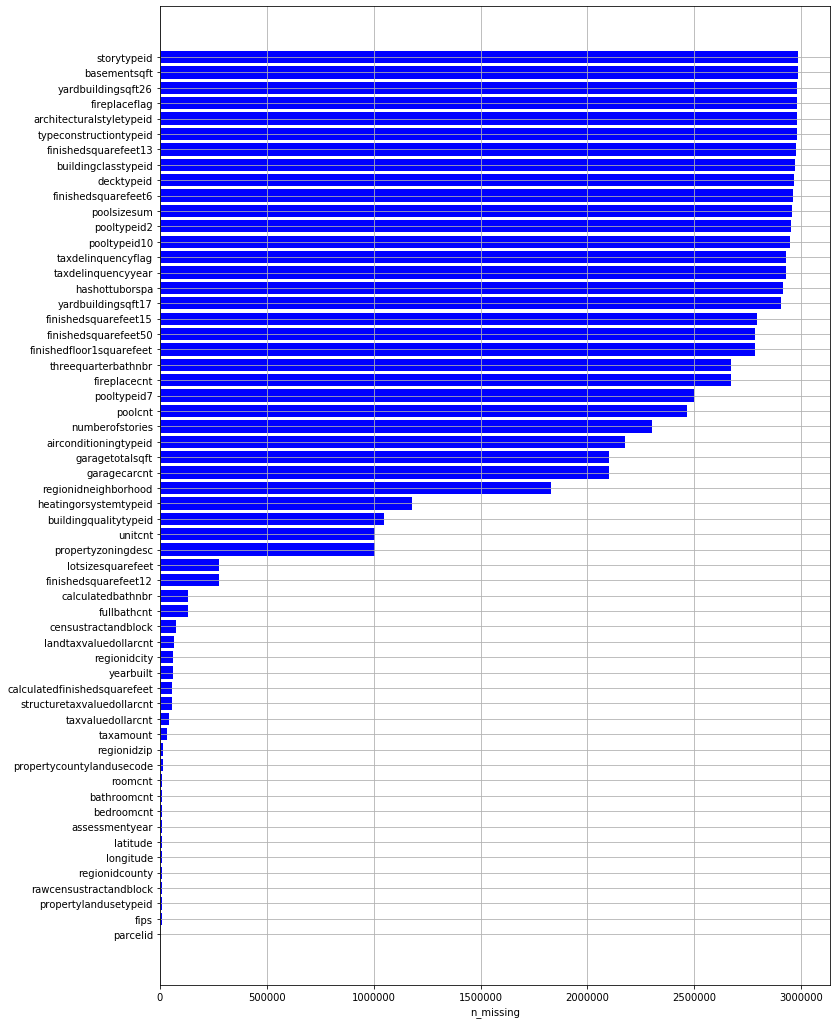

In [11]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['feature', 'n_missing']
missing_df = missing_df.loc[missing_df['n_missing'] >= 0].sort_values(by='n_missing')

ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.n_missing.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.feature.values, rotation='horizontal')
ax.set_xlabel("n_missing")
plt.grid()
plt.show() 

# VIZUALIZACIJA 1 -> popis znacajka i pripadni broj puta da je vrijednost za zapis bila NaN, tj. da 
# vrijednost nije zapisana

In [12]:
# dalje cemo razmatrati samo znacajke koje imamo prisutne u vise od 90% zapisa

missing_threshold = 0.1
filtered_missing_df = missing_df[missing_df['n_missing'] < missing_threshold * len(data)].set_index('feature')

okejish_features = list(filtered_missing_df.index)
okejish_features.remove('latitude')
okejish_features.remove('longitude')

okejish_data = data[okejish_features]

In [13]:
df = pd.merge(train_data, data, on='parcelid', how='left')
df.head()

parcelid  logerror transactiondate  airconditioningtypeid  \
0  11016594    0.0276      2016-01-01                    1.0   
1  14366692   -0.1684      2016-01-01                    NaN   
2  12098116   -0.0040      2016-01-01                    1.0   
3  12643413    0.0218      2016-01-02                    1.0   
4  14432541   -0.0050      2016-01-02                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingclasstypeid  buildingqualitytypeid  ...  numberofstories  \
0                  NaN                    4.0  ...              NaN   
1                  NaN                    NaN  ...              NaN   
2                  NaN                    4.0  ...              NaN   
3                  NaN                    4.0  ...              NaN   
4                  NaN                    NaN  ...              2.0   

   fireplaceflag  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0            NaN                    122754.0           360170.0   
1            NaN                    346458.0           585529.0   
2            NaN                     61994.0           119906.0   
3            NaN                    171518.0           244880.0   
4            NaN                    169574.0           434551.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
0          2015.0               237416.0    6735.88                 NaN   
1          2015.0               239071.0   10153.02                 NaN   
2          2015.0                57912.0   11484.48                 NaN   
3          2015.0                73362.0    3048.74                 NaN   
4          2015.0               264977.0    5488.96                 NaN   

   taxdelinquencyyear  censustractandblock  
0                 NaN         6.037107e+13  
1                 NaN                  NaN  
2                 NaN         6.037464e+13  
3                 NaN         6.037296e+13  
4                 NaN         6.059042e+13  

[5 rows x 60 columns]

In [14]:
cor = okejish_data.corr()
cor_with_output = abs(cor['taxamount'])
print(cor_with_output.sort_values(ascending=False)) 

# ispis znacajka i njihov koef.korelacije

taxamount                       1.000000
taxvaluedollarcnt               0.949731
landtaxvaluedollarcnt           0.821424
structuretaxvaluedollarcnt      0.807082
finishedsquarefeet12            0.594913
calculatedfinishedsquarefeet    0.538527
calculatedbathnbr               0.457954
fullbathcnt                     0.447666
bathroomcnt                     0.312825
bedroomcnt                      0.147094
yearbuilt                       0.122270
propertylandusetypeid           0.077552
roomcnt                         0.021474
rawcensustractandblock          0.021095
fips                            0.020960
regionidcity                    0.019069
censustractandblock             0.015252
assessmentyear                  0.015192
regionidzip                     0.014554
parcelid                        0.013466
regionidcounty                  0.004966
lotsizesquarefeet               0.003645
Name: taxamount, dtype: float64


In [90]:
# profiltriramo samo one znacajke koje imaju donekle smislenu vrijednost koef.korelacije, npr > 0.1
# sto nam vrati i neke smislene znacajke kao sto je bathroomcnt, bedroomcnt, yearbuild, squarefeet

cor_threshold = 0.1
cor_with_output = cor_with_output[cor_with_output > cor_threshold].sort_values(ascending=False)

features_with_geo_data = list(cor_with_output.index) + ["longitude", "latitude", "logerror"]

final_data = df[features_with_geo_data]

final_data['latitude'] = final_data['latitude'].div(1000000)
final_data['longitude'] = final_data['longitude'].div(1000000)

# final_data = final_data[final_data['latitude'].notna() & final_data['longitude'].notna()]
print(final_data)
final_data.to_csv("train_data.csv", index=False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


       taxamount  taxvaluedollarcnt  landtaxvaluedollarcnt  \
0        6735.88           360170.0               237416.0   
1       10153.02           585529.0               239071.0   
2       11484.48           119906.0                57912.0   
3        3048.74           244880.0                73362.0   
4        5488.96           434551.0               264977.0   
...          ...                ...                    ...   
90270    2495.24           191000.0               147200.0   
90271    1886.54           161111.0                43218.0   
90272    1925.70            38096.0                16088.0   
90273    2285.57           165869.0                32878.0   
90274    2560.96           163037.0                96779.0   

       structuretaxvaluedollarcnt  finishedsquarefeet12  \
0                        122754.0                1684.0   
1                        346458.0                2263.0   
2                         61994.0                2217.0   
3                  

<Figure size 864x864 with 0 Axes>

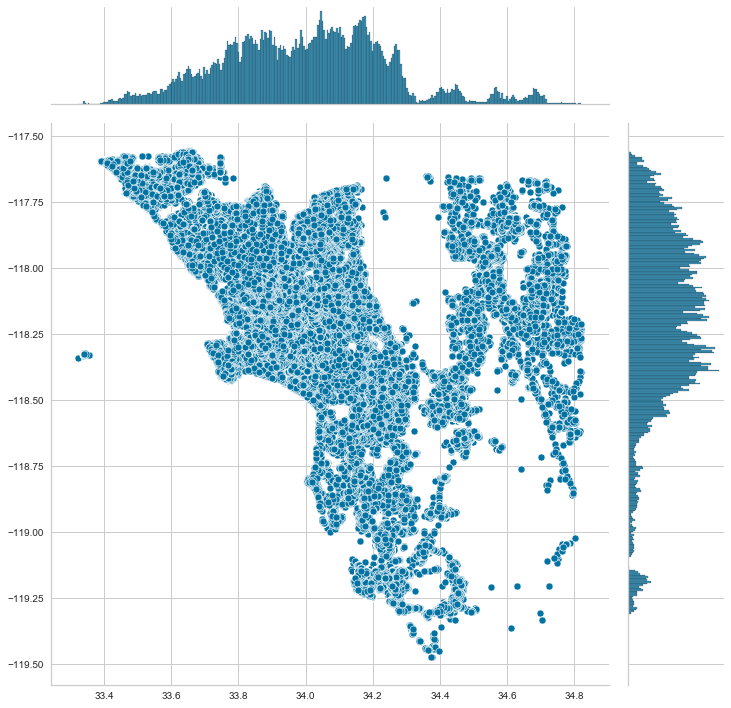

In [68]:
plt.figure(figsize=(12,12))
sns.jointplot(x=final_data.latitude.values, y=final_data.longitude.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

# VIZUALIZACIJA 2 -> geografski razmjestaj tocaka u datasetu

# KMeans clustering 

In [17]:
from scipy.cluster.vq import vq, kmeans
import time

In [18]:
geo_data = final_data[['latitude', 'longitude']]
max_iter = 80

## Elbow method

275.3417589664459
401.0660469532013
443.60572695732117
480.6089611053467
476.3856008052826
1623.3606951236725
577.662858247757
518.8698348999023
540.7160370349884
620.8819849491119
583.539746761322
646.2383110523224


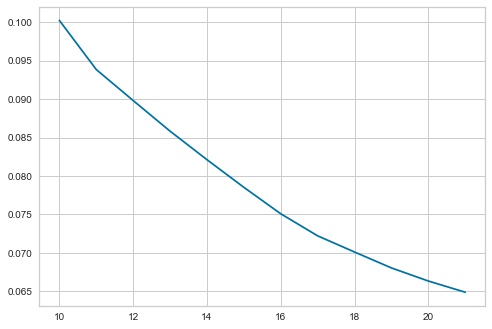

In [166]:
elbow_geo_data = geo_data # use .head(x) to put row limit

num_clusters = range(10, 22)
distortions = []
for k in num_clusters:
    start_time = time.time()
    _, distortion = kmeans(elbow_geo_data, k, iter = max_iter)
    distortions.append(distortion)
    print(time.time() - start_time)

plt.plot(num_clusters, distortions)

Some weak elbowing on 11 and 17, before that on 3 and 5 but that was worse. Check it out on silhouette plots

## Silhouette method

In [167]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

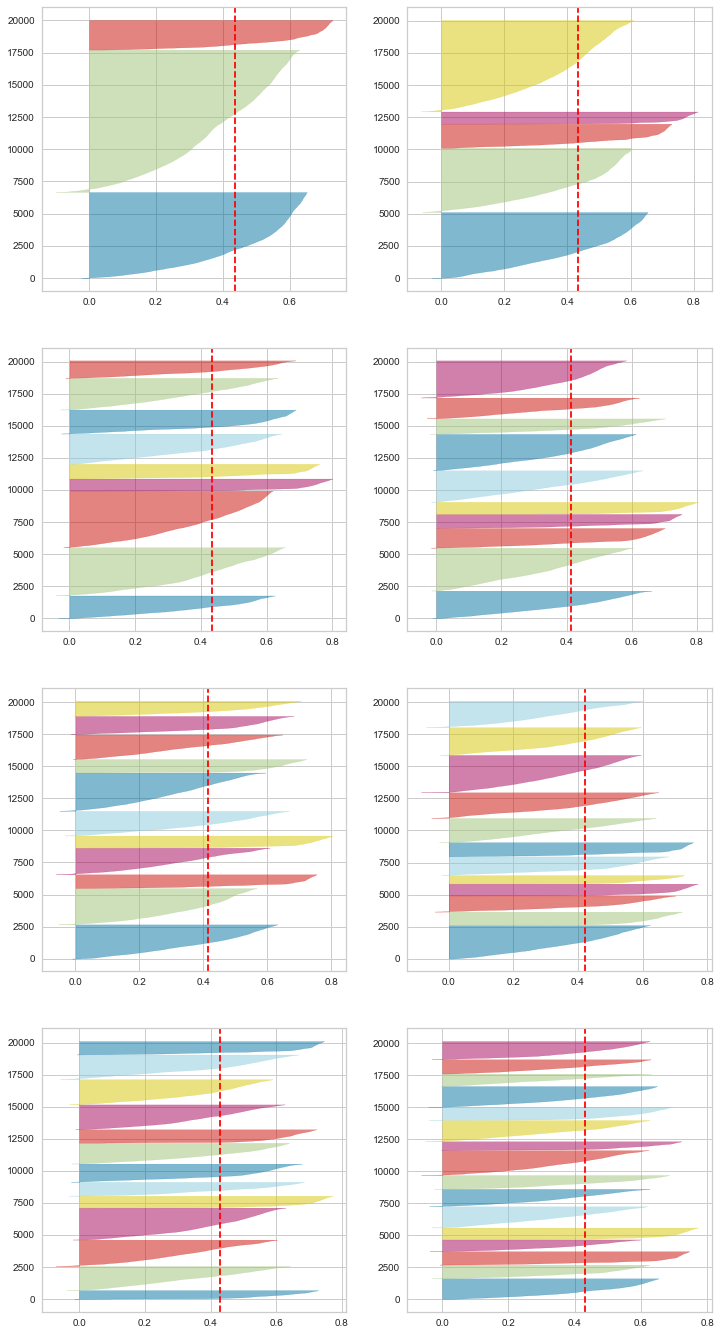

In [178]:
i_range = 4
j_range = 2
fig, ax = plt.subplots(i_range, j_range, figsize=(12,24))
ks = [3, 5, 9, 10, 11, 12, 13, 16, 17, 18];
plots = [[0,0], [0,1], [1,0], [1,1]]
for i in range(i_range):
    for j in range(j_range):
        km = KMeans(n_clusters=ks[i*j_range + j], init='k-means++', n_init=10, max_iter=max_iter, random_state=42)
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i][j])
        visualizer.fit(geo_data.head(20_000)) # this is pretty slow so we have to use a limit

# k = 11

### Vizualisation on map

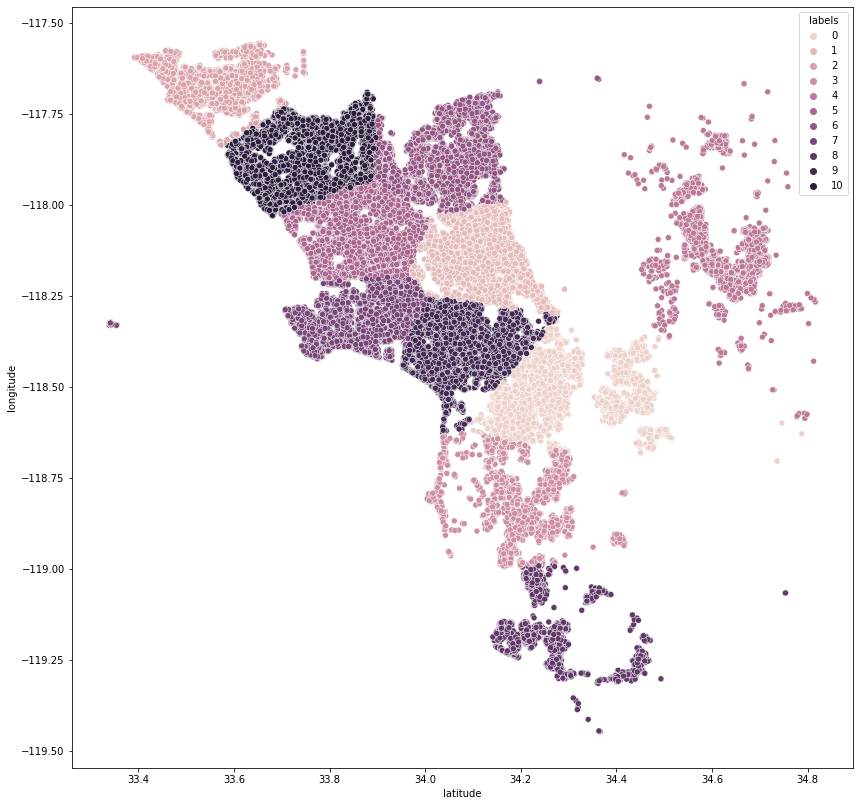

In [75]:
clustered_geo_data = geo_data.copy() # use .head(x) to set row limit
k = 11 # number of clusters

centroids, _ = kmeans(clustered_geo_data, k, iter = max_iter)
clustered_geo_data['labels'], _ = vq(clustered_geo_data, centroids)
plt.figure(figsize=(14,14))
sns.scatterplot(x = 'latitude', y = 'longitude', hue = 'labels', data = clustered_geo_data, legend="full")
plt.show()

### No. of samples by cluster

In [79]:
from collections import Counter, defaultdict

In [85]:
counts = Counter(clustered_geo_data["labels"])
for i in range(k):
    print(i, " > ", counts[i])
print("--------------------------------")
print("Avg. sample count by cluster = ", len(clustered_geo_data) / k )

0  >  9952
1  >  8615
2  >  8440
3  >  4636
4  >  4294
5  >  10788
6  >  7434
7  >  8270
8  >  3501
9  >  12473
10  >  11872
--------------------------------
Avg. sample count by cluster =  8206.818181818182


### Diameter of cluster

In [77]:
import geopy

In [78]:
diameters = []

for i in range(k):
    cluster_centroid = centroids[i]
    cluster_centroid_cord = (cluster_centroid[0], cluster_centroid[1])
    distances = []
    for _, row in clustered_geo_data[clustered_geo_data['labels'] == i].iterrows():
        row_cord = (row["latitude"], row["longitude"])
        distances.append(geopy.distance.distance(cluster_centroid_cord, row_cord).km)
    diameter = 2 * np.max(distances)
    print(i , " > ", diameter, "km")
    diameters.append(diameter)
    
print("--------------------------------")
print("Avg. diameter = ", sum(diameters) / k, "km" )

0  >  112.34980065558695 km
1  >  43.92549248665386 km
2  >  42.91679746747699 km
3  >  51.48247966244525 km
4  >  92.28864728990983 km
5  >  35.80309367146461 km
6  >  80.8073049520845 km
7  >  116.54240323602313 km
8  >  113.33405613029593 km
9  >  46.727391224174895 km
10  >  44.002870858184714 km
--------------------------------
Avg. diameter =  70.92548523948189 km


# k = 46

### Vizualisation on map 

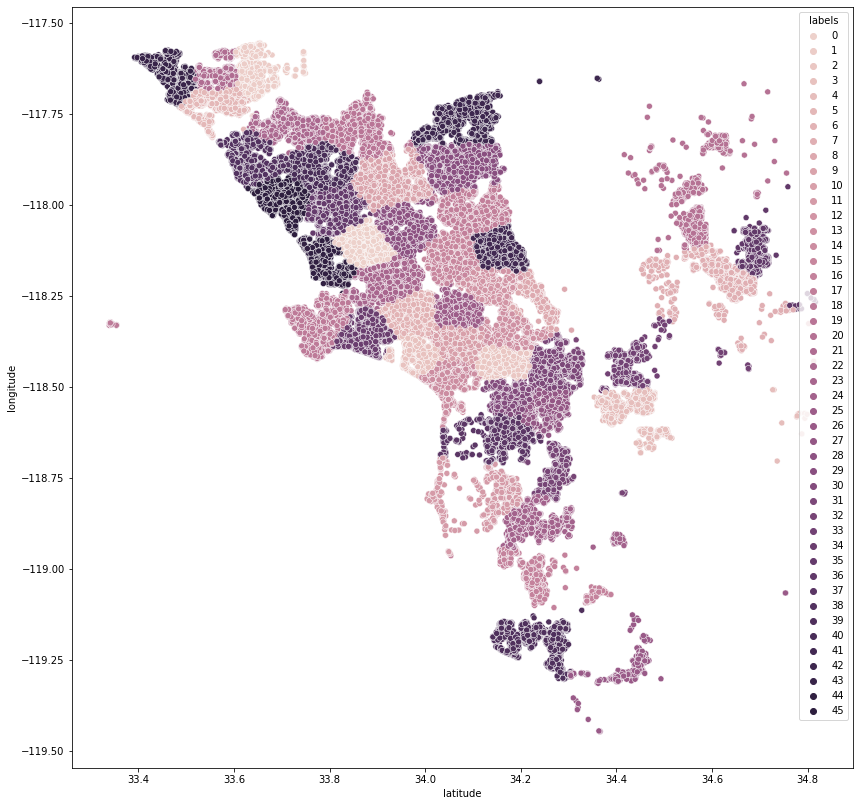

In [87]:
clustered_geo_data = geo_data.copy() # use .head(x) to set row limit
k = 46 # number of clusters

centroids, _ = kmeans(clustered_geo_data, k, iter = max_iter)
clustered_geo_data['labels'], _ = vq(clustered_geo_data, centroids)
plt.figure(figsize=(14,14))
sns.scatterplot(x = 'latitude', y = 'longitude', hue = 'labels', data = clustered_geo_data, legend="full")
plt.show()

### No. of samples by cluster

In [88]:
counts = Counter(clustered_geo_data["labels"])
for i in range(k):
    print(i, " > ", counts[i])
print("--------------------------------")
print("Avg. sample count by cluster = ", len(clustered_geo_data) / k )

0  >  2251
1  >  2496
2  >  2056
3  >  1977
4  >  1997
5  >  2634
6  >  2237
7  >  1628
8  >  1065
9  >  3032
10  >  2471
11  >  1192
12  >  1702
13  >  1773
14  >  2005
15  >  1943
16  >  1275
17  >  2261
18  >  2559
19  >  2422
20  >  1304
21  >  1282
22  >  2764
23  >  2127
24  >  1564
25  >  2031
26  >  331
27  >  1429
28  >  1987
29  >  2726
30  >  1790
31  >  2030
32  >  1179
33  >  1196
34  >  2554
35  >  2347
36  >  1316
37  >  1615
38  >  2323
39  >  2253
40  >  2417
41  >  1970
42  >  2118
43  >  1710
44  >  2690
45  >  2246
--------------------------------
Avg. sample count by cluster =  1962.5


### Diameter of cluster

In [89]:
diameters = []

for i in range(k):
    cluster_centroid = centroids[i]
    cluster_centroid_cord = (cluster_centroid[0], cluster_centroid[1])
    distances = []
    for _, row in clustered_geo_data[clustered_geo_data['labels'] == i].iterrows():
        row_cord = (row["latitude"], row["longitude"])
        distances.append(geopy.distance.distance(cluster_centroid_cord, row_cord).km)
    diameter = 2 * np.max(distances)
    print(i , " > ", diameter, "km")
    diameters.append(diameter)
    
print("--------------------------------")
print("Avg. diameter = ", sum(diameters) / k, "km" )


0  >  16.90673635722596 km
1  >  25.063216204028784 km
2  >  14.615679435329195 km
3  >  14.515537881046146 km
4  >  80.93071260253308 km
5  >  18.875275489380947 km
6  >  17.143358427627362 km
7  >  60.26729759431731 km
8  >  22.040040051107386 km
9  >  22.379631584013698 km
10  >  14.015488588921707 km
11  >  35.59747071120925 km
12  >  17.311106235451902 km
13  >  20.1139436691926 km
14  >  24.486977343739532 km
15  >  16.923820599417642 km
16  >  40.65301989371247 km
17  >  21.451407344904254 km
18  >  97.79485348487235 km
19  >  25.248647730782547 km
20  >  68.99107335833952 km
21  >  14.277995784843258 km
22  >  18.701693055710326 km
23  >  20.165796252940794 km
24  >  41.415954615984454 km
25  >  14.025188824657087 km
26  >  83.97525773789366 km
27  >  14.605763004805187 km
28  >  19.062122991004937 km
29  >  24.214268594918106 km
30  >  14.090026398971448 km
31  >  17.827377898531513 km
32  >  33.8343979054917 km
33  >  55.21243860887904 km
34  >  15.572389210307362 km
35  >  1